In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense  # 确保导入所有所需的层

In [19]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 将图像归一化到 [0, 1] 区间内
train_images, test_images = train_images / 255.0, test_images / 255.0

# 将图像数据从 (28, 28) 转换为 (28, 28, 1)，以匹配CNN的输入要求
train_images = train_images[..., tf.newaxis].astype("float32")
test_images = test_images[..., tf.newaxis].astype("float32")

In [20]:
# 定义输入形状
input_shape = (28, 28, 1)  # 假设为28x28像素的单通道图像

# 使用Input对象明确输入层
inputs = Input(shape=input_shape)

# 接着定义模型的其余部分，类似于之前的方式
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
# ... 其他层定义 ...
outputs = layers.Dense(10, activation='softmax')(x)  # 输出层使用softmax激活，适用于多分类问题

# 使用Model实例化模型
model = models.Model(inputs=inputs, outputs=outputs)

# 编译模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # 如果使用softmax激活，设置from_logits为False
              metrics=['accuracy'])

# 然后进行训练、验证等操作...

In [21]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 输出层有10个神经元，对应0-9十个数字
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8917 - loss: 0.3357 - val_accuracy: 0.9858 - val_loss: 0.0451
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9842 - loss: 0.0497 - val_accuracy: 0.9878 - val_loss: 0.0393
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9892 - loss: 0.0336 - val_accuracy: 0.9901 - val_loss: 0.0304
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9921 - val_loss: 0.0269
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9941 - loss: 0.0175 - val_accuracy: 0.9927 - val_loss: 0.0258
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9960 - loss: 0.0124 - val_accuracy: 0.9916 - val_loss: 0.0270
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9967 - loss: 0.0103 - val_accuracy: 0.9920 - val_loss: 0.0291
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9974 - loss: 0

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9910 - loss: 0.0314

Test accuracy: 0.9909999966621399


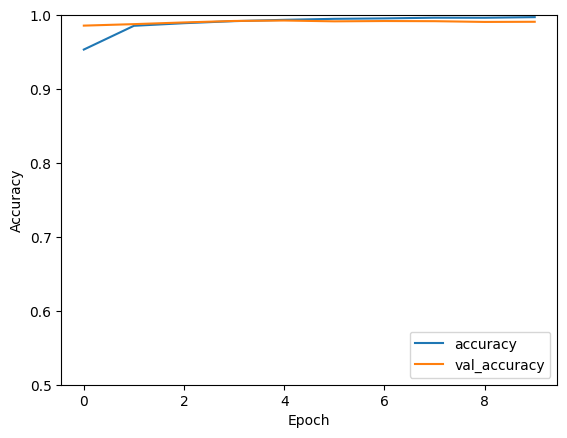

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.show()